# Lungs localization and measurement from CT scanner images

### Dataset retrieved from the Kaggle challenge: https://www.kaggle.com/kmader/finding-lungs-in-ct-data/home

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy import *
import os
from skimage.io import imread
%matplotlib inline

In [2]:
#from skimage.io import imread
from skimage.transform import rescale
#path = './finding-lungs-in-ct-data/2d_images'
path = './'
patient_file = '/ID_0000_Z_0142.tif'
image = imread(path+patient_file, as_gray=True)
u_image = imread(path+patient_file, as_gray=True).astype('uint16')

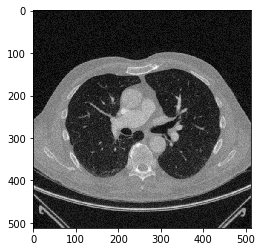

In [3]:
plt.imshow(image, cmap=plt.cm.Greys_r)
plt.show()

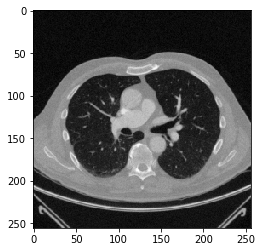

In [4]:
#rescale
image_rescaled = rescale(image, scale=0.5, mode='reflect', anti_aliasing=True, multichannel=False)
#%matplotlib inline 
plt.imshow(image_rescaled, cmap=plt.cm.Greys_r)
plt.show()

In [5]:
#Calculate image's histogram
from skimage.exposure import histogram
hist, hist_centers = histogram(image_rescaled)

Text(0, 0.5, 'pixels count')

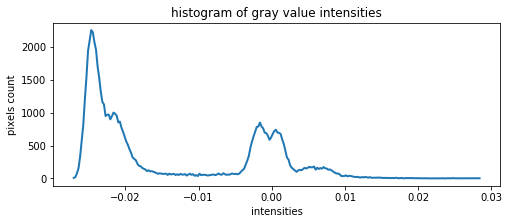

In [6]:
#Plot images histogram
fig, axes = plt.subplots(figsize=(8,3))
axes.plot(hist_centers, hist, lw=2)
axes.set_title('histogram of gray value intensities')
axes.set_xlabel('intensities')
axes.set_ylabel('pixels count')

### Try different thresholding approaches

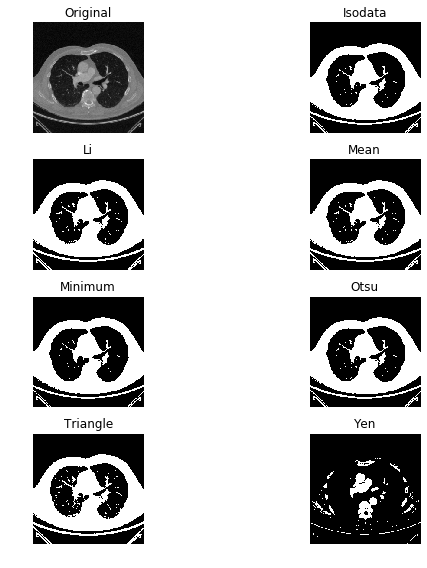

In [7]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(image_rescaled, figsize=(10, 8), verbose=False)
plt.show()

## Otsu's Thresholding

In [8]:
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, disk
#threshold = threshold_otsu(image)
#th_image = image < threshold

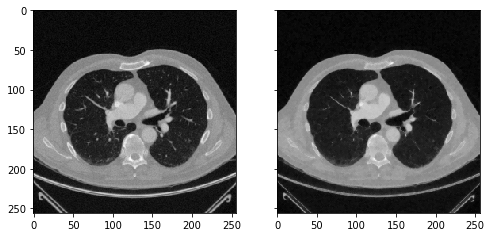

In [9]:
#Apply erosion on greyscale image
selem = disk(1)
eroded_img = erosion(image_rescaled, selem)
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axes[0].imshow(image_rescaled, cmap=plt.cm.Greys_r)
axes[1].imshow(eroded_img, cmap=plt.cm.Greys_r)

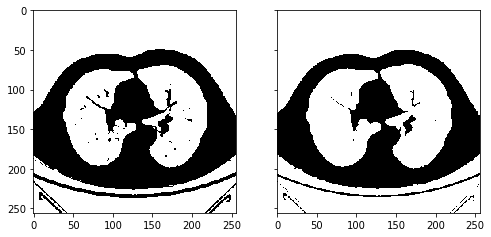

In [10]:
#Calculate optimum threshold with Otsu's thresholding
threshold = threshold_otsu(image_rescaled)
segmented = np.where(image_rescaled<threshold, image_rescaled.min(), image_rescaled.max())
th_image = image_rescaled < threshold
th_image2 = eroded_img < threshold
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
axes[0].imshow(th_image, cmap=plt.cm.Greys_r)
axes[1].imshow(th_image2, cmap=plt.cm.Greys_r)

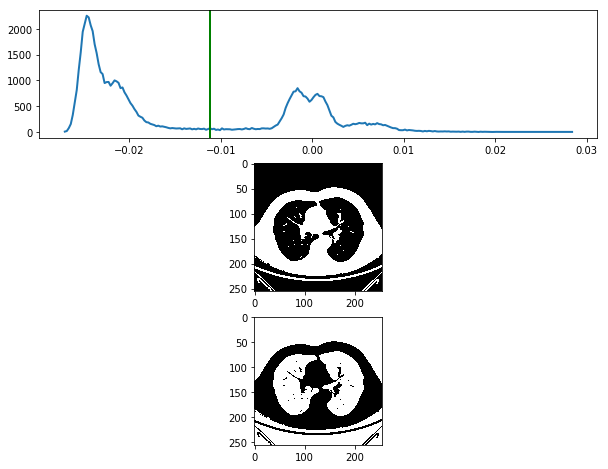

In [11]:
#Plot image after thresholding
th = 0.01
segmented = np.where(image_rescaled<threshold, image_rescaled.min(), image_rescaled.max())
#%matplotlib inline
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
axes[0].plot(hist_centers, hist, lw=2)
axes[0].axvline(threshold, color='green', lw=2)
axes[1].imshow(segmented, cmap=plt.cm.Greys_r)
axes[2].imshow(th_image, cmap=plt.cm.Greys_r)
#plt.imshow(th_image, cmap=plt.cm.Greys_r)
#plt.imshow(image<-0.01, cmap=plt.cm.Greys_r)
plt.show()

In [12]:
#Label regions
from skimage.measure import label, regionprops
labelled_image = label(th_image)

In [13]:
regions = regionprops(labelled_image)

In [14]:
regions_images = []
for n_region in np.unique(labelled_image):
    img = np.where(labelled_image==n_region, th_image.max(), 0)
    regions_images.append(img)

In [15]:
prop_list = regionprops(labelled_image, coordinates='rc')
region_features = []
for region in prop_list:
    features = []
    features.append(region.area)
    features.append(region.bbox_area)
    features.append(region.convex_area)
    features.append(region.eccentricity)
    features.append(region.equivalent_diameter)
    features.append(region.euler_number)
    features.append(region.extent)
    features.append(region.filled_area)
    features.append(region.label)
    features.append(region.major_axis_length)
    features.append(region.minor_axis_length)
    features.append(region.orientation)
    features.append(region.perimeter)
    features.append(region.solidity)
    #np.append(region_features, np.array(features))
    region_features.append(np.array(features))
         

In [16]:
region_features = np.array(region_features)
region_features

array([[ 1.82110000e+04,  3.37920000e+04,  3.34080000e+04,
         9.44560705e-01,  1.52272668e+02,  1.00000000e+00,
         5.38914536e-01,  1.82110000e+04,  1.00000000e+00,
         3.34617112e+02,  1.09867123e+02, -1.56145142e+00,
         8.57883297e+02,  5.45108956e-01],
       [ 7.16400000e+03,  1.15700000e+04,  8.86900000e+03,
         8.29430383e-01,  9.55064820e+01, -8.00000000e+00,
         6.19187554e-01,  7.20800000e+03,  2.00000000e+00,
         1.41295117e+02,  7.89288791e+01,  1.37996419e-01,
         7.04837662e+02,  8.07757357e-01],
       [ 6.85800000e+03,  1.13160000e+04,  8.94100000e+03,
         7.88064861e-01,  9.34445119e+01, -1.80000000e+01,
         6.06044539e-01,  6.96400000e+03,  3.00000000e+00,
         1.31895280e+02,  8.11937076e+01, -1.02622480e-02,
         7.40121933e+02,  7.67028297e-01],
       [ 7.00000000e+00,  9.00000000e+00,  7.00000000e+00,
         8.16496581e-01,  2.98541066e+00,  1.00000000e+00,
         7.77777778e-01,  7.00000000e+00,  4.

In [17]:
feature_names = ['area', 'bbox_area', 'convex_area', 
                  'eccentricity', 'equivalent_diameter',
                 'euler_number', 'extent', 'filled_area',
                 'label', 'major_axis_length', 
                 'minor_axis_length', 'orientation',
                 'perimeter', 'solidity']
region_features_df = pd.DataFrame(region_features, 
                                  columns=feature_names)

In [18]:
color_dict = {'cyan', 'red', 'green', 'blue', 'orange', 'pink', 'yellow', 'brown'}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9618fbf60>,
      dtype=object)

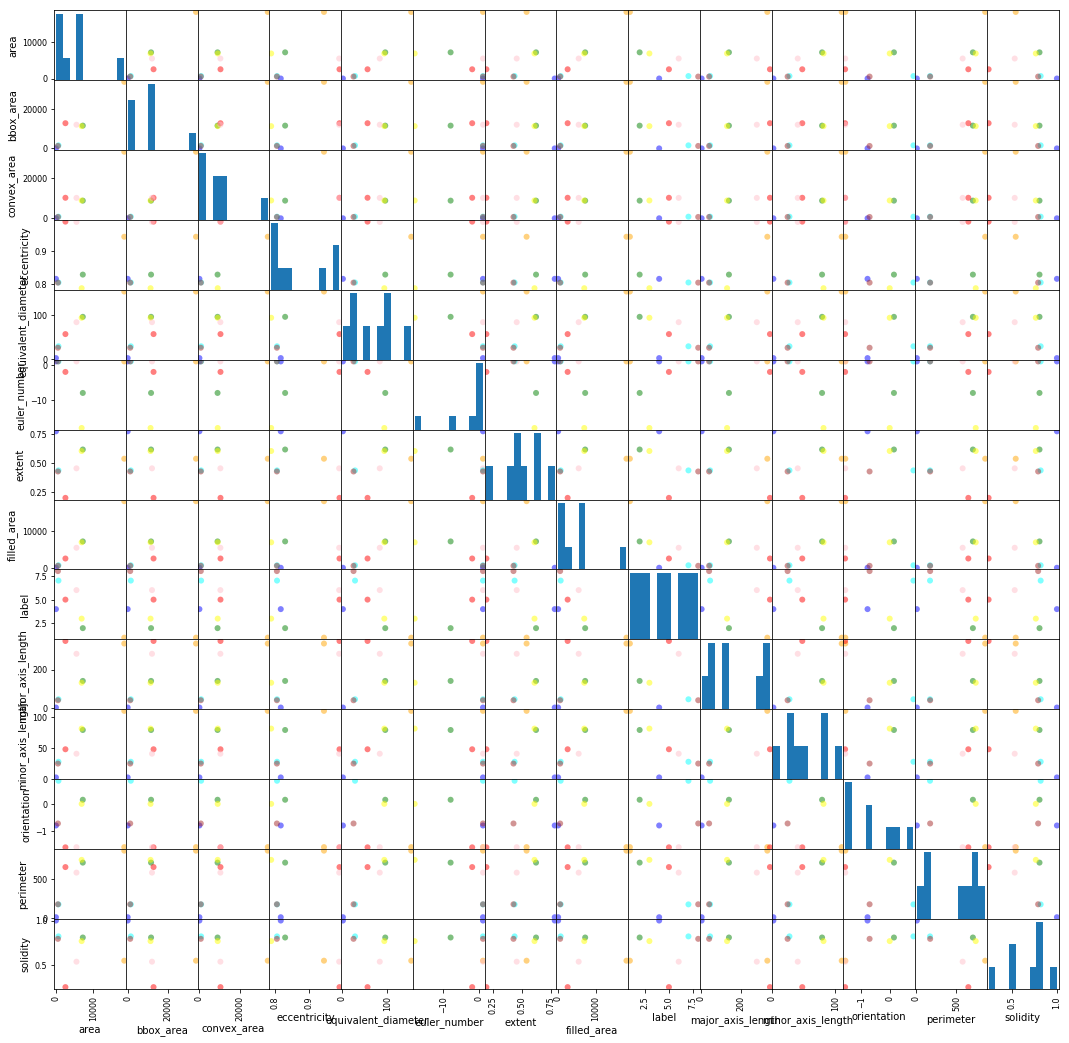

In [19]:
%matplotlib inline
pd.plotting.scatter_matrix(region_features_df, c=color_dict, figsize=(18,18), marker='o')

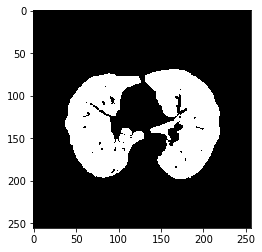

In [20]:
plt.imshow(np.logical_or(regions_images[3], regions_images[2]).astype('float'), cmap=plt.cm.Greys_r)
plt.show()

Lung segmentation bibliography¶

>https://github.com/wanwanbeen/ct_lung_segmentation

>https://wiki.cancerimagingarchive.net/display/Public/Lung+CT+Segmentation+Challenge+2017#aa0e6507654a4f1282eddcf7bd047915

>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4521615/

>http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html

